In [1]:
import geopandas as gpd

# 坐标参考系：Coordinate Reference Systems

### crs属性：查看坐标参考系的信息

In [2]:
china = gpd.read_file('./datasets/china/china_counties.shp')

In [3]:
china.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
china

,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,1,110101,东城区,0.415102,0.004417,"POLYGON ((116.40581 39.96245, 116.40783 39.960..."
1,2,110102,西城区,0.394567,0.005304,"POLYGON ((116.38784 39.97167, 116.38789 39.970..."
2,3,110105,朝阳区,1.505849,0.049028,"MULTIPOLYGON (((116.48030 40.07965, 116.48970 ..."
3,4,110106,丰台区,1.346741,0.032195,"POLYGON ((116.31743 39.88626, 116.31527 39.880..."
4,5,110107,石景山区,0.515045,0.008883,"POLYGON ((116.14949 39.98832, 116.15085 39.986..."
...,...,...,...,...,...,...
2900,2901,710210,前镇区,0.215416,0.001689,"POLYGON ((120.32254 22.61569, 120.32342 22.613..."
2901,2902,710211,旗津区,0.170950,0.000441,"POLYGON ((120.27170 22.61347, 120.27464 22.611..."
2902,2903,710212,小港区,0.314396,0.004117,"POLYGON ((120.36048 22.50767, 120.35556 22.510..."
2903,2904,810000,香港特别行政区,6.491279,0.097800,"MULTIPOLYGON (((113.91455 22.16283, 113.91516 ..."


Text(0.5, 1.0, 'EPSG:4326')

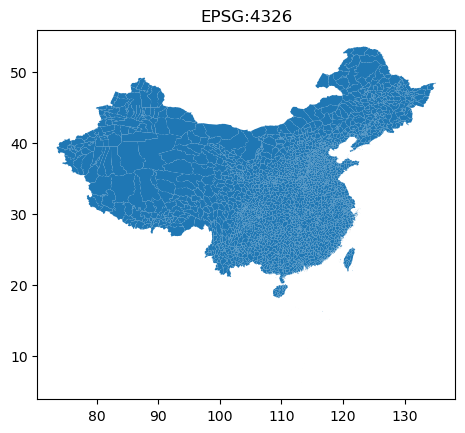

In [5]:
# 通过坐标轴也可以看出，该数据坐标系为地理坐标系
ax = china.plot()
ax.set_title("EPSG:4326")

# 设置投影：Setting a Projection

### 通过 set_crs() 方法设置投影

In [6]:
china_no_rojection = gpd.read_file('./datasets/china/china_counties_no_rojection.shp')

In [7]:
china_no_rojection

,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,1,110101,东城区,0.415102,0.004417,"POLYGON ((116.40581 39.96245, 116.40783 39.960..."
1,2,110102,西城区,0.394567,0.005304,"POLYGON ((116.38784 39.97167, 116.38789 39.970..."
2,3,110105,朝阳区,1.505849,0.049028,"MULTIPOLYGON (((116.48030 40.07965, 116.48970 ..."
3,4,110106,丰台区,1.346741,0.032195,"POLYGON ((116.31743 39.88626, 116.31527 39.880..."
4,5,110107,石景山区,0.515045,0.008883,"POLYGON ((116.14949 39.98832, 116.15085 39.986..."
...,...,...,...,...,...,...
2900,2901,710210,前镇区,0.215416,0.001689,"POLYGON ((120.32254 22.61569, 120.32342 22.613..."
2901,2902,710211,旗津区,0.170950,0.000441,"POLYGON ((120.27170 22.61347, 120.27464 22.611..."
2902,2903,710212,小港区,0.314396,0.004117,"POLYGON ((120.36048 22.50767, 120.35556 22.510..."
2903,2904,810000,香港特别行政区,6.491279,0.097800,"MULTIPOLYGON (((113.91455 22.16283, 113.91516 ..."


In [8]:
print(china_no_rojection.crs)

None


In [9]:
# 设置投影，以下两种方式均可
china_re = china_no_rojection.set_crs("EPSG:4326")
# china_re = china_no_rojection.set_crs(epsg=4326)

In [10]:
china_re.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# 重投影：Re-Projecting

In [11]:
# 查看数据的坐标信息
china.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# 转换坐标参考系
china_re = china.to_crs(epsg=3857)

In [13]:
china_re.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'EPSG:3857')

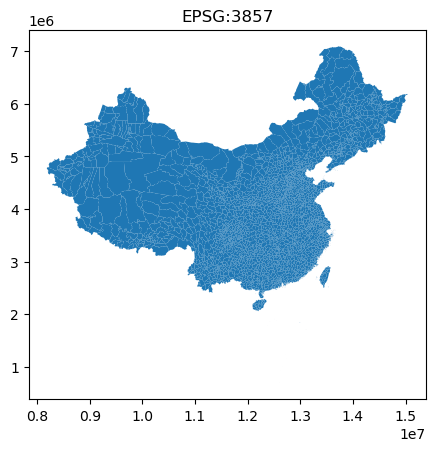

In [14]:
ax = china_re.plot()
ax.set_title("EPSG:3857")